# LIBRARIES

In [2]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Pregunta 1: Utilice yfinance para extraer datos bursátiles

Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head.

In [3]:
# Crear un objeto para Tesla usando el módulo Ticker
tesla = yf.Ticker("TSLA")

# Obtener los datos históricos de Tesla con el período máximo
tesla_history = tesla.history(period="max")

# Mostrar los primeros cinco registros para verificar
print(tesla_history.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# Pregunta 2: Utilizar Webscraping para extraer datos de ingresos de Tesla

Muestre las cinco últimas filas del marco de datos tesla_revenue utilizando la función tail. 

In [7]:
# URL de la página web de ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Encabezados para simular una solicitud de navegador web
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Enviar una solicitud GET a la URL con los encabezados
response = requests.get(url, headers=headers)
response.raise_for_status()  # Asegurarse de que la solicitud fue exitosa

# Parsear los datos HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar todas las tablas en la página
tables = soup.find_all('table')

# Buscar la tabla específica que contiene los datos de ingresos de Tesla
tesla_revenue_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.get_text():
        tesla_revenue_table = table
        break

# Verificar si la tabla fue encontrada
if tesla_revenue_table is None:
    print("Tabla de ingresos no encontrada.")
else:
    # Crear una lista para almacenar los datos
    tesla_revenue = []

    # Extraer los datos de la tabla
    for row in tesla_revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.replace("$", "").replace(",", "").strip()
            tesla_revenue.append([date, revenue])

    # Convertir la lista a un DataFrame
    tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

    # Mostrar los primeros cinco registros para verificar
    print(tesla_revenue_df.head())

         Date Revenue
0  2024-03-31   21301
1  2023-12-31   25167
2  2023-09-30   23350
3  2023-06-30   24927
4  2023-03-31   23329


# Pregunta 3: Utilice yfinance para extraer datos bursátiles

Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos gme_data utilizando la función head. 

In [8]:
# Crear un objeto para GameStop usando el módulo Ticker
gamestop = yf.Ticker("GME")

# Obtener los datos históricos de GameStop con el período máximo
gamestop_history = gamestop.history(period="max")

# Mostrar los primeros cinco registros para verificar
print(gamestop_history.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Pregunta 4: Utilizar Webscraping para extraer datos de ingresos de la GME

Muestre las cinco últimas filas del marco de datos gme_revenue utilizando la función tail. 

In [10]:
# URL de la página web de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Encabezados para simular una solicitud de navegador web
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Enviar una solicitud GET a la URL con los encabezados
response = requests.get(url, headers=headers)
response.raise_for_status()  # Asegurarse de que la solicitud fue exitosa

# Parsear los datos HTML usando BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar todas las tablas en la página
tables = soup.find_all('table')

# Buscar la tabla específica que contiene los datos de ingresos de GameStop
gamestop_revenue_table = None
for table in tables:
    if 'GameStop Quarterly Revenue' in table.get_text():
        gamestop_revenue_table = table
        break

# Verificar si la tabla fue encontrada
if gamestop_revenue_table is None:
    print("Tabla de ingresos no encontrada.")
else:
    # Crear una lista para almacenar los datos
    gamestop_revenue = []

    # Extraer los datos de la tabla
    for row in gamestop_revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.replace("$", "").replace(",", "").strip()
            gamestop_revenue.append([date, revenue])

    # Convertir la lista a un DataFrame
    gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Date", "Revenue"])

    # Mostrar los primeros cinco registros para verificar
    print(gamestop_revenue_df.head())

         Date Revenue
0  2024-01-31    1794
1  2023-10-31    1078
2  2023-07-31    1164
3  2023-04-30    1237
4  2023-01-31    2226


# Pregunta 5: Graficar las acciones de Tesla

Use la función make_graph para graficar los datos de las acciones de Tesla, también proporcione un título para el gráfico.

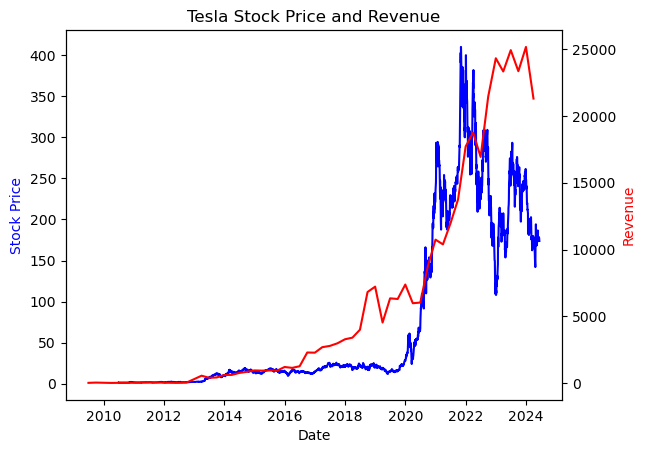

In [12]:
# Convertir las fechas a formato datetime
tesla_history['Date'] = pd.to_datetime(tesla_history['Date'])
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])

# Limpiar los datos de ingresos, eliminando valores no numéricos
tesla_revenue_df['Revenue'] = pd.to_numeric(tesla_revenue_df['Revenue'], errors='coerce')
tesla_revenue_df.dropna(subset=['Revenue'], inplace=True)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Graficar los datos históricos de las acciones
ax1.plot(tesla_history['Date'], tesla_history['Close'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Crear un segundo eje para los ingresos
ax2 = ax1.twinx()
ax2.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'], 'r-')
ax2.set_ylabel('Revenue', color='r')

plt.title('Tesla Stock Price and Revenue')
plt.show()

# Pregunta 6: Graficar el Stock de GameStop

Utilice la función make_graph para representar gráficamente los datos de existencias de GameStop, también proporcione un título para el gráfico.

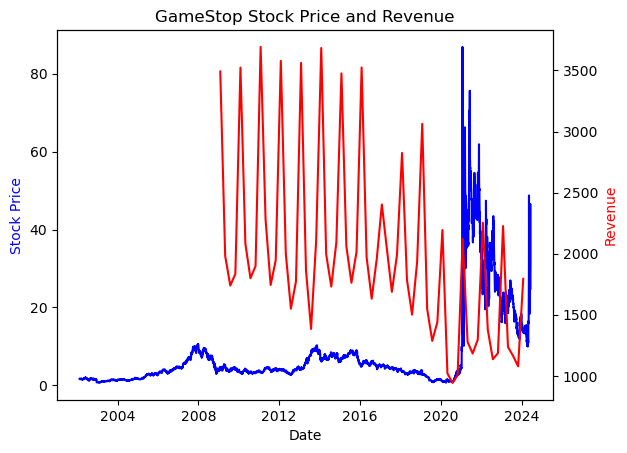

In [13]:
# Convertir las fechas a formato datetime
gamestop_history.reset_index(inplace=True)
gamestop_history['Date'] = pd.to_datetime(gamestop_history['Date'])
gamestop_revenue_df['Date'] = pd.to_datetime(gamestop_revenue_df['Date'])

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Graficar los datos históricos de las acciones
ax1.plot(gamestop_history['Date'], gamestop_history['Close'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Crear un segundo eje para los ingresos
ax2 = ax1.twinx()
ax2.plot(gamestop_revenue_df['Date'], gamestop_revenue_df['Revenue'].astype(float), 'r-')
ax2.set_ylabel('Revenue', color='r')

plt.title('GameStop Stock Price and Revenue')
plt.show()

# Author:
#    Karla Trejo.